In [1]:
import cv2 
import numpy as np
import glob
import os
from itertools import combinations 
from itertools import product
import random
import matplotlib.pyplot as plt
from random import randrange
import sys
import math
#apt install python-pydot python-pydot-ng graphviz

In [2]:
# import cv2 
# import numpy as np
# import glob
# import os
# from itertools import combinations 
# from itertools import product
# import random
# import matplotlib.pyplot as plt
# from random import randrange
# import sys
#apt install python-pydot python-pydot-ng graphviz

In [3]:
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz

In [4]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten,Conv2D,Conv2DTranspose,Lambda,concatenate,GlobalMaxPooling2D,Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model,Sequential
#from keras.initializers.h as 
from tensorflow.python.keras.utils.vis_utils import plot_model

#below is specific for tf2
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation

#for tf1 random rotation
#tf.keras.preprocessing.image.random_rotation
#from tensorflow.keras.preprocessing.image import random_rotation


#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2 
from pandas import read_excel
import pydot


!{sys.executable} -m pip install tensorflow-addons

### below is specific for tf2
import tensorflow_addons as tfa

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.9.0-dev20220126). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(


In [5]:
print(tf.__version__)

2.9.0-dev20220126


In [6]:
path_input_images =  '/tensorflow/IITD_Database/'

In [7]:
mask_path  = '/tensorflow/iit_unet/mask_data/'

In [8]:
# data = read_excel(data_in_labels_path, sheetname='Sheet1')

In [9]:
# data.head()

In [10]:
def change_name(name):
    d = name.split('/')
    mask_name = 'frame' + '_' + d[0]+'_'+d[1] +'.png'
    return mask_name


In [11]:
#rows = data[data['image_name']=='001_04.bmp']

In [12]:
#rows['Y1p'].iloc[0]

In [13]:
def read_simaese_parametric_data(path_input_images, folder_name_list_batch,mask_path,batch_size):
    
    
    h  = 128
    w = 128 
    c = 1
    factor  = 4
    
    train_out1 = np.zeros((factor*batch_size,h,w,c),'float')
    train_out2 = np.zeros((factor*batch_size,h,w,c),'float')
#     train_seg1 = np.zeros((factor*batch_size,h,w,1),'float')
#     train_seg2 = np.zeros((factor*batch_size,h,w,1),'float')
    
    out1= np.zeros((factor*batch_size,h,w,c),'float')
    out2= np.zeros((factor*batch_size,h,w,c),'float')
    
#     seg1= np.zeros((factor*batch_size,h,w,1),'float')
#     seg2= np.zeros((factor*batch_size,h,w,1),'float')
    
    pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
    pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

    neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
    #
    count = 0
    y = []
    
    for folder_name in folder_name_list_batch:

        for j in range (len(pos_comb1)-9):
           
            i = random.randint(0, 9)
        
            ## read the image from folder in postive combination 
            #print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img1_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            
            
            img1_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')
#             print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')

            img1_0 = cv2.resize(img1_0[:,:,0],(h,w))    #c = 1
            img1_1 = cv2.resize(img1_1[:,:,0],(h,w))
            ##get the correspondance segmentation data 
#             name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
#             name2 = folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)
#             seg1_0 = cv2.imread(mask_path + change_name(name1))
#             seg1_1 = cv2.imread(mask_path + change_name(name2))
#             ###############################################################
#             seg1_0 = cv2.cvtColor(seg1_0,cv2.COLOR_BGR2GRAY)
#             seg1_1 = cv2.cvtColor(seg1_1,cv2.COLOR_BGR2GRAY)
            
#             seg1_0 = cv2.resize(seg1_0,(h,w))
#             seg1_1 = cv2.resize(seg1_1,(h,w))
            
            ## save the image data to out and out2         
            out1[count]  = np.expand_dims(img1_0,axis=2) #img1_0
            out2[count]  = np.expand_dims(img1_1,axis=2) #img1_1
#             seg1[count]  = np.expand_dims(seg1_0,axis=2)
#             seg2[count]  = np.expand_dims(seg1_1,axis=2)
            
            #save the segmentation data to lable 

            
            ## posive combination assigning 0 to last clolumn
            y.append(1.0)
            
            ## increament the count
            count = count+1
            
            

            img2_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)+'.bmp')
            img2_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)+'.bmp')
            img2_0 = cv2.resize(img2_0[:,:,0],(h,w)) ## C = 1
            img2_1 = cv2.resize(img2_1[:,:,0],(h,w))  ## c = 1
            
            name1 = folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)
#             seg2_0 = cv2.imread(mask_path + change_name(name1))
#             seg2_1 = cv2.imread(mask_path + change_name(name2)) 
            
#             seg2_0 = cv2.cvtColor(seg2_0,cv2.COLOR_BGR2GRAY)
#             seg2_1 = cv2.cvtColor(seg2_1,cv2.COLOR_BGR2GRAY)
#             seg2_0 = cv2.resize(seg2_0,(h,w))
#             seg2_1 = cv2.resize(seg2_1,(h,w))
            out1[count]  = np.expand_dims(img2_0,axis=2)#img2_0
            out2[count]  = np.expand_dims(img2_1,axis=2)#img2_1
#             seg1[count]  = np.expand_dims(seg2_0,axis=2)
#             seg2[count]  = np.expand_dims(seg2_1,axis=2)          

            y.append(1.0)
            count = count+1

            
            ## negative combination left vs right iris for same person 
            folder_name2 = str(int(folder_name) + 1).zfill(3)
#             print('neg_combi =' + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
#             print('neg_combi =' + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_0 = cv2.imread(path_input_images + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_1 = cv2.imread(path_input_images + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
            img3_0 = cv2.resize(img3_0[:,:,0],(h,w))  #c = 1
            img3_1 = cv2.resize(img3_1[:,:,0],(h,w))
            
            name1 = folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(neg_comb1[i][1]).zfill(2)
#             seg3_0 = cv2.imread(mask_path + change_name(name1))
#             seg3_1 = cv2.imread(mask_path + change_name(name2))
            
#             seg3_0 = cv2.cvtColor(seg3_0,cv2.COLOR_BGR2GRAY)
#             seg3_1 = cv2.cvtColor(seg3_1,cv2.COLOR_BGR2GRAY)
            
#             seg3_0 = cv2.resize(seg3_0,(h,w))
#             seg3_1 = cv2.resize(seg3_1,(h,w))
            
            out1[count]  = np.expand_dims(img3_0,axis=2) #img3_0
            out2[count]  = np.expand_dims(img3_1,axis=2) #img3_1
#             seg1[count]  = np.expand_dims(seg3_0,axis=2)
#             seg2[count]  = np.expand_dims(seg3_1,axis=2)
            ## assigning 1 to negative combinations (left vs right image)
            y.append(0.0)
            count = count+1

            
            ## creating the negativ combination from diffrent person 
            folder_name1 = str(int(folder_name) + 3).zfill(3) 
            img4_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img4_1 = cv2.imread(path_input_images + folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')

            img4_0 = cv2.resize(img4_0[:,:,0],(h,w))
            img4_1 = cv2.resize(img4_1[:,:,0],(h,w))
            name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
            name2 = folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)
#             seg4_0 = cv2.imread(mask_path + change_name(name1))
#             seg4_1 = cv2.imread(mask_path + change_name(name2))

#             seg4_0 = cv2.cvtColor(seg4_0,cv2.COLOR_BGR2GRAY)
#             seg4_1 = cv2.cvtColor(seg4_1,cv2.COLOR_BGR2GRAY)        

#             seg4_0 = cv2.resize(seg4_0,(h,w))
#             seg4_1 = cv2.resize(seg4_1,(h,w))
            
            out1[count]  = np.expand_dims(img4_0,axis=2)#img4_0
            out2[count]  = np.expand_dims(img4_1,axis=2) #img4_1
#             seg1[count]  = np.expand_dims(seg4_0,axis=2)
#             seg2[count]  = np.expand_dims(seg4_1,axis=2)
            y.append(0.0)
            count = count+1
            #print(i)
            
    ## this padding the data set for size 256x512 to maintain spect rationa nd segmentation parameters 
    train_out1 = out1
    train_out2 = out2 
    
#     train_seg1 = seg1
#     train_seg2 = seg2  
    
    
#     train_out1[:,0:240,0:320,:] = out1
#     train_out2[:,0:240,0:320,:] = out2 
    
#     train_seg1[:,0:240,0:320,:] = seg1
#     train_seg2[:,0:240,0:320,:] = seg2     
    
    return train_out1,train_out2,y
        #print(count) 

In [14]:
#print(np.array(list(product([2,3,4,5], [8,9,10]))))
print(np.array(list(combinations([1, 2, 3, 4, 5], 2))))


[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]]


In [15]:
#fileList = listOfFiles     
def imageLoader(path_input_images,folder_name_list,mask_path,batch_size):

    L = len(folder_name_list)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = randrange(L-batch_size)
        batch_end = batch_start + batch_size

        if (batch_end < L):
            limit = min(batch_end, L)
            train_out1,train_out2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[batch_start:limit],mask_path,batch_size)
            train_out1 = train_out1/255.
            train_out2 = train_out2/255.
#             train_seg1 = train_seg1/255.
#             train_seg2 = train_seg2/255.
            batch_start = batch_end
            batch_end = batch_start + batch_size
            #print(batch_start,batch_end)
            ## just for the test 
            #yield (train_out2,train_seg2)
            ## original
            yield ([train_out1,train_out2],np.array(y_class)) #a tuple with two numpy arrays with batch_size samples     

In [16]:
folder_names = np.sort(os.listdir(path_input_images))
folder_name_list = folder_names[0:120] 
folder_name_list_test = folder_names[120:220]
print(len(folder_name_list_test))

100


### Function to check the GT and loader 

In [17]:
def draw_haugh_circle(img_L,img_R, hough_param):        
    
    
    print('pair_classification =', int(hough_param[12]))
    cimg = img_L.copy()
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),int(hough_param[2]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),int(hough_param[5]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),2,(0,0,255),3)
    plt.title('left_image')
    plt.imshow(cimg)
    plt.show()
    
    
    cimg = img_R.copy()
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),int(hough_param[8]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),int(hough_param[11]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),2,(0,0,255),3)
    plt.title('right_image')
    plt.imshow(cimg)
    plt.show()

In [18]:
g=0
while (g < 5):

    Out = next(imageLoader(path_input_images,folder_name_list,mask_path,4))
    g = g+1


In [19]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

# mask_L_R_class = Out[1]

# mask_L = mask_L_R_class[0]
# mask_R = mask_L_R_class[1]
y = Out[1]
print(y[0])
#print(image_L.shape)

1.0


# mask_L.shape

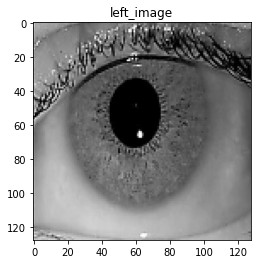

In [20]:
plt.title('left_image')
plt.imshow(np.squeeze(image_R[1]),cmap='gray')
plt.show()

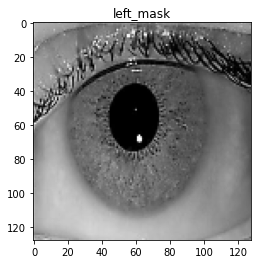

In [21]:
plt.title('left_mask')
plt.imshow(np.squeeze(image_L[1]),cmap='gray')
plt.show()

In [22]:
#pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
#pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

#neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
#print(neg_comb1)

In [23]:
folder_names = np.sort(os.listdir(path_input_images))

print(folder_names[0:20])

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020']


In [24]:
# def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
#     """Function to add 2 convolutional layers with the parameters passed to it"""
#     # first layer
#     x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
#               kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
#     if batchnorm:
#         x = BatchNormalization()(x)
#     x = Activation('relu')(x)
    
#     # second layer
#     x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
#               kernel_initializer = 'he_normal', padding = 'same')(x)
#     if batchnorm:
#         x = BatchNormalization()(x)
#     x = Activation('relu')(x)
    
#     return x

In [25]:
initialize_weights = 'he_normal'
initialize_bias = 'he_normal'

In [26]:
def base_network_unet():
    input = Input(shape=(128,128,1), name="base_input")
    n_filters=16
    dropout=.1
    batchnorm=True
       
    c1 = Conv2D(n_filters*1, (3,3), activation='relu',
                   kernel_initializer=initialize_weights,padding = 'same', kernel_regularizer=l2(2e-4))(input)
    p1 = MaxPooling2D((2,2))(c1)           # (h/2,w/2,16)
    p1 = Dropout(dropout)(p1) 

    c2 = Conv2D(n_filters*2, (3,3), activation='relu',
                   kernel_initializer=initialize_weights,padding = 'same', kernel_regularizer=l2(2e-4))(p1)
    p2 = MaxPooling2D((2,2))(c2)  # (h/4,w/4,32)
    p2 = Dropout(dropout)(p2) 

    c3 = Conv2D(n_filters*4, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p2)
    p3 = MaxPooling2D((2,2))(c3)  # (h/8,w/8,64)
    p3 = Dropout(dropout)(p3) 

    c4 = Conv2D(n_filters*8, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p3)
    p4 = MaxPooling2D((2,2))(c4)  # (h/16,w/16,128)
    p4 = Dropout(dropout)(p4) 

    c5 = Conv2D(n_filters*16, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p4)      # (h/16,w/16,256)


    print("encoder done")


    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)  # (h/8,w/8,128)
    u6 = concatenate([u6, c4])   # (h/8,w/8,128)
    u6 = Dropout(dropout)(u6)
        
    c6 = Conv2D(n_filters*8, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u6) # (h/8,w/8,128)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)  # (h/4,w/4,64)
    u7 = concatenate([u7, c3])   # (h/8,w/8,128)
    u7 = Dropout(dropout)(u7)
    c7 = Conv2D(n_filters*4, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u7) # (h/4,w/4,64)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)  # (h/2,w/2,32)
    u8 = concatenate([u8, c2])   # (h/2,w/2,32)
    u8 = Dropout(dropout)(u8)
    c8 = Conv2D(n_filters*2, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u8)     # (h/2,w/2,32)

    u9 = Conv2DTranspose(n_filters, (3, 3), strides = (2, 2), padding = 'same')(c8)  # (h,w,16)
    u9 = concatenate([u9, c1])   # (h,w,16)
    u9 = Dropout(dropout)(u9)
    c9 = Conv2D(n_filters, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u9)     # (h,w,16)    


    print("decoder done . . .  siamese network will start" )
    #X_outputs = Conv2D(1,(1,1),activation='sigmoid',name='seg_out')(c9)
   
    print("simaese model done")
    return Model(inputs=input, outputs=c9)
    
    

In [27]:
def base_network_siamese():
    
    input = Input(shape=(128,128,16), name="base_input")
#     degrees  = tf.constant(0,dtype='float32')
#     r1 = tfa.image.rotate(input[0],input[1])
    
    c10 = Conv2D(64, (10,10), activation='relu',
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4))(input)
    p10 = MaxPooling2D()(c10)
    
#     r10 = tfa.image.rotate(p10,degrees, interpolation='BILINEAR')
    
    c11 = Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p10)
    p11 = MaxPooling2D()(c11)
    c12 = Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p11)
    p12 = MaxPooling2D()(c12)
    c13 = Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p12)
    a1 = Flatten()(c13)
    a2 = Dense(128, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias)(a1)  
    
    print("simaese model done")
    return Model(inputs=input, outputs=a2)

In [28]:
def euclidean_distance(vects):
    x, y = vects
    
    x0, x1, x2, x3, x4 = tf.split(x, num_or_size_splits=5, axis=1)
    
    y0, y1, y2, y3, y4 = tf.split(y, num_or_size_splits=5, axis=1)

#     v_size =128
#     sum_square_1 = K.sum(K.square(x[0:128] - y[0:128]), axis=1, keepdims=True)           ## batch_size x 1 
#     sum_square_2 = K.sum(K.square(x[0:128] - y[128:2*128]), axis=1, keepdims=True)    ## batch_size x 1 
#     sum_square_3 = K.sum(K.square(x[0:128] - y[2*128:3*128]), axis=1, keepdims=True)    ## batch_size x 1 
#     sum_square_4 = K.sum(K.square(x[0:128] - y[3*128:4*128]), axis=1, keepdims=True)    ## batch_size x 1 
#     sum_square_5 = K.sum(K.square(x[0:128] - y[4*128:5*128]), axis=1, keepdims=True)    ## batch_size x 1 
    
    
#     min_sum_square1 =  K.minimum(sum_square_1,sum_square_2)
#     min_sum_square2 = K.minimum(sum_square_3,sum_square_4)
#     min_sum_square3 = K.minimum(min_sum_square1,min_sum_square2)
#     min_sum_square4 = K.minimum(min_sum_square3,sum_square_5)
    
    
    
    sum_square_1 = K.sum(K.square(x0 - y0), axis=1, keepdims=True)           ## batch_size x 1 
    sum_square_2 = K.sum(K.square(x0 - y1), axis=1, keepdims=True)    ## batch_size x 1 
    sum_square_3 = K.sum(K.square(x0 - y2), axis=1, keepdims=True)    ## batch_size x 1 
    sum_square_4 = K.sum(K.square(x0 - y3), axis=1, keepdims=True)    ## batch_size x 1 
    sum_square_5 = K.sum(K.square(x0 - y4), axis=1, keepdims=True)    ## batch_size x 1 
    
    
    min_sum_square1 =  K.minimum(sum_square_1,sum_square_2)
    min_sum_square2 = K.minimum(sum_square_3,sum_square_4)
    min_sum_square3 = K.minimum(min_sum_square1,min_sum_square2)
    min_sum_square4 = K.minimum(min_sum_square3,sum_square_5) 
    
    
    
    return K.sqrt(K.maximum(min_sum_square4, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [29]:
base_network_1 = base_network_unet()
#below is specific to tf2
#plot_model(base_network_1, show_shapes=True, show_layer_names=True, to_file='base-model.png')

2022-01-30 13:49:55.071052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


encoder done
decoder done . . .  siamese network will start
simaese model done


2022-01-30 13:49:55.076833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 13:49:55.077218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 13:49:55.078940: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-30 13:49:55.079404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [30]:
base_network_2 = base_network_siamese()
#plot_model(base_network_2, show_shapes=True, show_layer_names=True, to_file='base-model.png')

simaese model done


In [32]:
# create the left input and point to the base network
input_a = Input(shape=(128,128,1), name="left_input")

seg_logit_a = base_network_1(input_a)

# create the right input and point to the base network
input_b = Input(shape=(128,128,1), name="right_input")

seg_logit_b = base_network_1(input_b)

degree_1  = (2*np.pi/360)
delta = .000001


#below is specific for tf2 working

seg_logit_b_1 = RandomRotation(factor=(degree_1,degree_1+delta))(seg_logit_b)
seg_logit_b_2 = RandomRotation(factor=(2*degree_1,2*degree_1+delta))(seg_logit_b)
seg_logit_b_n1 = RandomRotation(factor=(-1*degree_1,-1*degree_1+delta))(seg_logit_b)
seg_logit_b_n2 = RandomRotation(factor=(-2*degree_1,-2*degree_1+delta))(seg_logit_b)


## below is specific for tf1 and not wokring

# seg_logit_b_1 = random_rotation(seg_logit_b,rg=1)
# seg_logit_b_2 = random_rotation(seg_logit_b,rg=2)
# seg_logit_b_n1 = random_rotation(seg_logit_b,rg=-1)
# seg_logit_b_n2 = random_rotation(seg_logit_b,rg=-2)



vect_a0 = base_network_2(seg_logit_a)





vect_0 = base_network_2(seg_logit_b)
vect_1 = base_network_2(seg_logit_b_1)
vect_2 = base_network_2(seg_logit_b_2)
vect_n1 = base_network_2(seg_logit_b_n1)
vect_n2 = base_network_2(seg_logit_b_n2)

vect_output_b = concatenate([vect_0, vect_1, vect_2, vect_n1, vect_n2]) 

vect_output_a = concatenate([vect_a0, vect_1, vect_2, vect_n1, vect_n2])  

# # measure the similarity of the two vector outputs
output_siasmese = Lambda(euclidean_distance, name="output_layer", output_shape=(128,1))([vect_output_a, vect_output_b])

# # specify the inputs and output of the model
model = Model([input_a, input_b], output_siasmese)


In [33]:
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 right_input (InputLayer)       [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 128, 128, 16  1176160     ['left_input[0][0]',             
                                )                                 'right_input[0][0]']      

In [35]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [36]:
#optimizer = keras.optimizers.Adam(lr = 0.0001)


#siamese_model.compile(loss=custom_loss, optimizer=optimizer, metrics = ['mae', 'acc'])
model.compile(loss = {'output_layer' : contrastive_loss_with_margin(margin=1)
                     },optimizer='Adam', metrics = ['mae', 'acc'])

In [37]:
#steps_per_epoch = train_length // batch_size
batch_size = 4
steps_per_epoch = len(folder_name_list) // batch_size
validation_steps = len(folder_name_list_test) // batch_size

In [38]:

# history = siamese_model.fit_generator(imageLoader(path_input_images,folder_name_list,batch_size),steps_per_epoch,
#                     validation_data = imageLoader(path_input_images,folder_name_list_test,batch_size), 
#                     validation_steps=validation_steps, epochs=50)

In [39]:
history = model.fit_generator(imageLoader(path_input_images,folder_name_list,mask_path,batch_size),steps_per_epoch,
                    validation_data = imageLoader(path_input_images,folder_name_list_test,mask_path,batch_size), 
                    validation_steps=validation_steps, epochs=50)

Epoch 1/50


/tmp/ipykernel_3271/3126931981.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(imageLoader(path_input_images,folder_name_list,mask_path,batch_size),steps_per_epoch,
2022-01-30 13:50:57.293317: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-01-30 13:50:58.681076: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x672a8c0


30/30 [==============================] - 21s 478ms/step - loss: 0.8112 - mae: 0.9334 - acc: 0.1854 - val_loss: 0.7700 - val_mae: 0.6930 - val_acc: 0.3000
Epoch 2/50
30/30 [==============================] - 14s 459ms/step - loss: 0.6844 - mae: 0.9002 - acc: 0.1500 - val_loss: 0.5996 - val_mae: 0.9062 - val_acc: 0.0725
Epoch 3/50
30/30 [==============================] - 14s 462ms/step - loss: 0.5817 - mae: 0.9232 - acc: 0.0729 - val_loss: 0.6198 - val_mae: 0.6886 - val_acc: 0.2500
Epoch 4/50
30/30 [==============================] - 14s 462ms/step - loss: 0.5321 - mae: 0.8829 - acc: 0.0854 - val_loss: 0.5170 - val_mae: 0.7953 - val_acc: 0.1075
Epoch 5/50
30/30 [==============================] - 14s 463ms/step - loss: 0.4721 - mae: 0.8902 - acc: 0.0688 - val_loss: 0.4778 - val_mae: 0.7930 - val_acc: 0.1275
Epoch 6/50
30/30 [==============================] - 14s 464ms/step - loss: 0.4232 - mae: 0.9914 - acc: 0.0604 - val_loss: 0.4134 - val_mae: 0.9092 - val_acc: 0.0500
Epoch 7/50
30/30 [===

30/30 [==============================] - 14s 462ms/step - loss: 0.0658 - mae: 1.0454 - acc: 0.0063 - val_loss: 0.1036 - val_mae: 0.9612 - val_acc: 0.0600


In [ ]:
accuracy_list  = history.history['output_layer_mae']

print(accuracy_list)

In [ ]:
# import matplotlib.pyplot as plt
# # Let's take a look at how we did during training.
# acc = history.history['model_4_acc']
# val_acc = history.history['val_model_4_acc']

# loss = history.history['model_4_loss']
# val_loss = history.history['val_model_4_loss']
# epochs = range(len(acc))

# # Accuracy
# fig, ax = plt.subplots(1, 2, figsize=(30, 10))
# ax[0].plot(epochs, acc, 'r', label='Training accuracy')
# ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
# ax[0].set_title('Training and validation accuracy')
# ax[0].legend()

# # Loss
# ax[1].plot(epochs, loss, 'r', label='Training Loss')
# ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
# ax[1].set_title('Training and validation loss')
# ax[1].legend()

# plt.show()

In [ ]:
model_save_path = '/tensorflow/siamese_model/siamese_unet_pixel_half_seg_rotation_learn_mask_30epoch_120_train_test.h5'
model.save(model_save_path)

In [ ]:
model = load_model(model_save_path,custom_objects={'contrastive_loss':contrastive_loss_with_margin(margin=1)})

In [40]:
Out = next((imageLoader(path_input_images,folder_name_list_test,mask_path,1)))

In [41]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

# mask_L_R_class = Out[1]

# mask_L = mask_L_R_class[0]
# mask_R = mask_L_R_class[1]
y = Out[1]
print(y[0])
print(image_L.shape)
#plt.title('left_mask')
#plt.imshow(np.squeeze(mask_R[1]))
#plt.imshow(image_R[1])
#plt.show()

1.0
(4, 128, 128, 1)


In [42]:




preds = model.predict([image_L,image_R])





1/1 [==============================] - 1s 755ms/step


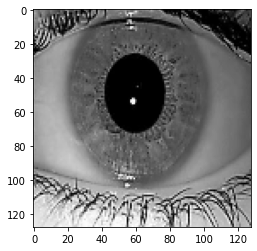

In [43]:

#plt.imshow(np.squeeze(mask_R[1]))
plt.imshow(image_R[1],cmap='gray')
plt.show()

In [44]:
# out_image = np.squeeze(preds[1][1])
# preds[0].shape

In [45]:

# dummy_image = image_R[1].copy() 
# dummy_image[out_image<.5] = 0
# plt.imshow(dummy_image,cmap='gray')
# plt.show()

In [46]:
y = preds
print(y)

[[0.09939823]
 [0.1419605 ]
 [0.6913125 ]
 [0.48256335]]


## Test data for model 

In [47]:
test_out1,test_out2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[0:100],mask_path,100)

In [48]:
test_out1 = test_out1/255.0
test_out2 = test_out2/255.0
# test_seg1 = test_seg1/255.0
# test_seg2 = test_seg2/255.0

In [49]:
 y_pred = model.predict([test_out1,test_out2])

2022-01-30 15:00:00.824833: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.72GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


13/13 [==============================] - 4s 187ms/step


In [50]:
#test_seg2.shape

In [51]:
#y_pred

In [52]:
seg_out1 = base_network_1.predict(test_out1)

13/13 [==============================] - 0s 21ms/step


2022-01-30 15:00:06.968364: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 419430400 exceeds 10% of free system memory.


In [53]:
# test_seg_out1 = Conv2D(1,(1,1),activation='sigmoid',name='seg_out')(seg_out1)
test_seg_out1 = seg_out1.copy()
test_seg_out1.shape

(400, 128, 128, 16)

In [54]:
def show_images(test_out1,test_seg_out1):
    #num_images = len(test_seg_out1)
    num_images = 20
    for i in range(0,num_images,4):
        dummy_image = np.squeeze(test_out1[i]).copy()
        seg_img = np.squeeze(test_seg_out1[i])
        dummy_image[seg_img<.1] = 0
        plt.imshow(np.squeeze(test_out1[i]),cmap='gray')
        plt.show()
        plt.imshow(seg_img,cmap='gray')
        plt.show()

In [55]:
show_images(test_out1,test_seg_out1)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [56]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.7
    return np.mean(pred == y_true)

In [57]:
compute_accuracy(y_class, y_pred)      ## trained on 120 images and tested on 100 persons 

0.99

In [ ]:
!{sys.executable} -m pip install -U scikit-learn scipy

In [ ]:
import scipy.stats
from sklearn.metrics import confusion_matrix
#

confusion_matrix(y_class, y_pred.ravel() < 0.5)                      ##   [TN , FP]
                                                                     ##     [FN , TP] 

In [ ]:
def rotate_image_tensor(image, angle, mode='black'):
    """
    Rotates a 3D tensor (HWD), which represents an image by given radian angle.

    New image has the same size as the input image.

    mode controls what happens to border pixels.
    mode = 'black' results in black bars (value 0 in unknown areas)
    mode = 'white' results in value 255 in unknown areas
    mode = 'ones' results in value 1 in unknown areas
    mode = 'repeat' keeps repeating the closest pixel known
    """
    s = image.get_shape().as_list()
    assert len(s) == 3, "Input needs to be 3D."
    assert (mode == 'repeat') or (mode == 'black') or (mode == 'white') or (mode == 'ones'), "Unknown boundary mode."
    image_center = [np.floor(x/2) for x in s]

    # Coordinates of new image
    coord1 = tf.range(s[0])
    coord2 = tf.range(s[1])

    # Create vectors of those coordinates in order to vectorize the image
    coord1_vec = tf.tile(coord1, [s[1]])

    coord2_vec_unordered = tf.tile(coord2, [s[0]])
    coord2_vec_unordered = tf.reshape(coord2_vec_unordered, [s[0], s[1]])
    coord2_vec = tf.reshape(tf.transpose(coord2_vec_unordered, [1, 0]), [-1])

    # center coordinates since rotation center is supposed to be in the image center
    coord1_vec_centered = coord1_vec - image_center[0]
    coord2_vec_centered = coord2_vec - image_center[1]

    coord_new_centered = tf.cast(tf.pack([coord1_vec_centered, coord2_vec_centered]), tf.float32)

In [ ]:
  image = tf.constant(np.zeros((384, 512, 5)), dtype = tf.float32)
  image = tfa.image.rotate(image, tf.random.uniform(shape = [], minval = -0.3, maxval = 0.3))

In [ ]:
tf.random.uniform(shape = [], minval = -0.3, maxval = 0.3)

In [ ]:
tf.constant(0,dtype='float32')

In [ ]:
128*5 # (2*np.pi/360)*   

In [ ]:
c = tf.constant([1.0, 2.0, 3.0, 4.0])          #2x4 
d = tf.constant([3.0, 4.0, 1.0,2.0])  

In [ ]:
print(concatenate([c,d],axis=0)[0:4])

In [ ]:
# a = tf.squeeze(tf.constant(np.zeros((None,512)),dtype=tf.float32))
a = tf.zeros([None, 4], tf.float32)


In [ ]:
a